# Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings('ignore') 

# Feature Discription

In [2]:
dic=pd.read_excel('Data_Dictionary.xlsx')
dic=dic.set_index('Variable')
dic

,Description
Variable,
ID,Unique ID for every Customer
account_type,Account Type – current or saving
gender,Gender of customer
age,Age of customer
region_code,Code assigned to region of residence (has order)
cc_cons_apr,Credit card spend in April
dc_cons_apr,Debit card spend in April
cc_cons_may,Credit card spend in May
dc_cons_may,Debit card spend in May


# Data loading and cleaning

In [3]:
data_train=pd.read_csv('train.csv').set_index('ID')
data_train.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


Null value Cheack

In [4]:
data_train.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
c

dataset has not null value..

In [5]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,47.790600,3.063277e+01,25.00,33.0000,40.00,53.0000,223.00
region_code,15000.0,598.415467,2.200623e+02,123.00,424.0000,623.00,799.0000,974.00
cc_cons_apr,15000.0,17957.391719,2.518794e+04,253.00,4411.0275,10288.10,21405.0000,441031.33
dc_cons_apr,15000.0,8171.098287,1.477303e+04,19.35,1634.0000,3996.90,9339.0200,229255.00
cc_cons_may,15000.0,16337.054662,2.706085e+04,157.00,3638.0000,8695.03,18951.3000,1117246.31
dc_cons_may,15000.0,7703.605203,1.898730e+04,22.00,1643.5000,3820.50,8212.0000,911223.49
cc_cons_jun,15000.0,12129.010832,1.848878e+04,65.00,3004.5000,6655.25,14247.0000,382914.10
dc_cons_jun,15000.0,7097.395321,1.325170e+04,62.00,1358.7500,3327.00,7597.0000,233384.00
cc_count_apr,15000.0,41.488333,9.743225e+01,1.00,5.0000,10.00,44.0000,531.00
cc_count_may,15000.0,33.490200,4.954100e+01,1.00,8.0000,23.00,43.0000,601.00


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 12554 to 4547
Data columns (total 43 columns):
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-null float64
vehicle_loan_active      15000

From descibe part i find that:-
#the feature name "'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', and 'vehicle_loan_closed' " have 0 varience so we have to drop this columns
#maximum  age  243 is also not posible,so we have to investigate these columns!
#investment4 column which has negative value,which have to invesigate

In [7]:
std=data_train.describe().iloc[2,:]
std_0=std[std==0].index
std_0

Index(['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed'],
      dtype='object')

In [31]:
#negative value treatment in investment4 column
data_train['investment_4']=data_train['investment_4'].apply(lambda x: -x if x<0 else x)


In [32]:
#dont have any variance in data so removing it from data

data_train=data_train.drop(std_0,axis=1)


In [33]:
data_train=data_train.drop('loan_enq',axis=1)

In [34]:
data_train.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons'],
      dtype='object')

In [35]:
#feature which are in numeric nature
numeric=set(data_train.columns)-{'account_type', 'gender', 'region_code'}
#for only independent feature
numeric=numeric-{'cc_cons'}

In [36]:
#feature which are numerical in nature
numeric_data=data_train[numeric]
cat_data=data_train[{'account_type', 'gender'}]

# Plot of every feature

# Univarient:-
for numerical feature

index 34 is out of bounds for axis 0 with size 34


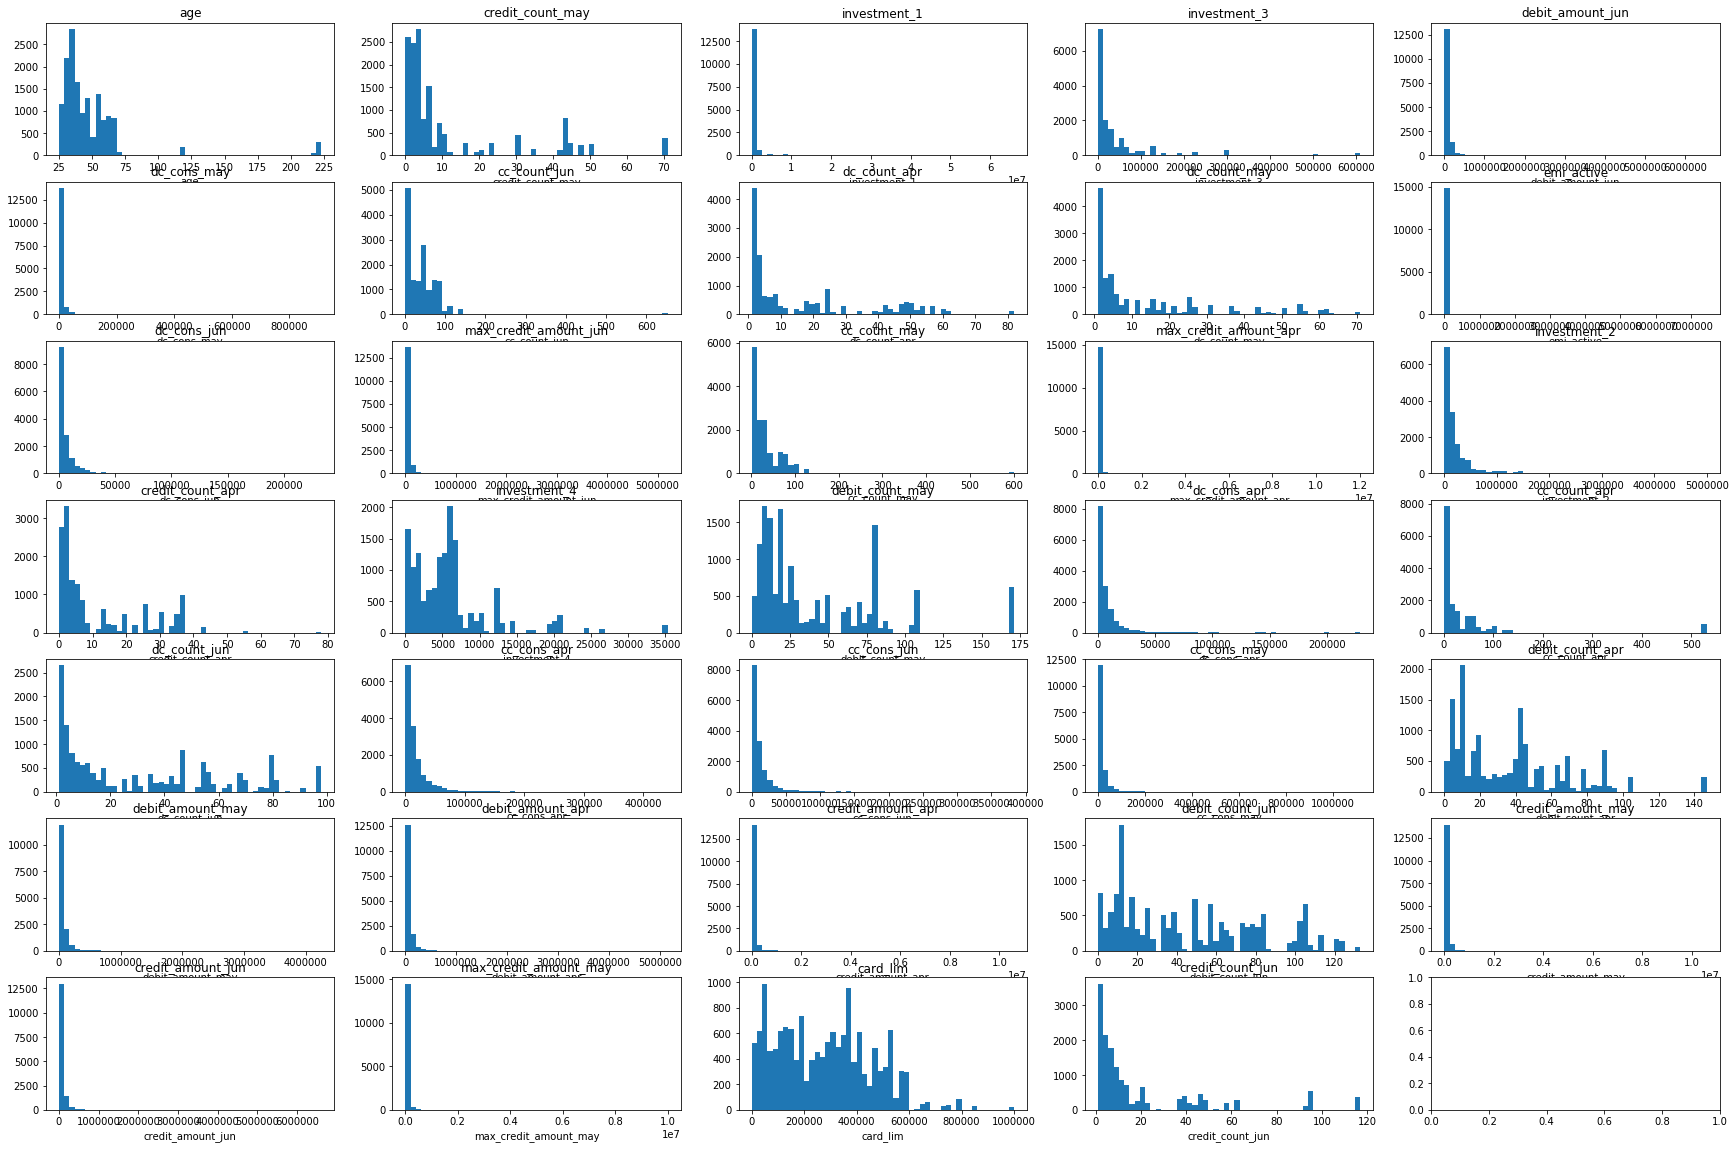

In [37]:
cols = numeric_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            axes[i,j].hist(numeric_data[col],bins=50)
            #plt.figure(figsize=(20,20))
            axes[i,j].set_xlabel(col)
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

     
            
            

for categorical feature:-


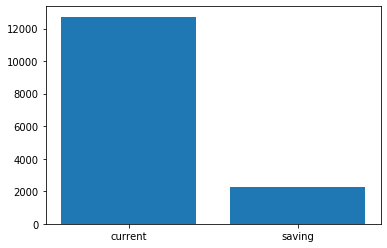

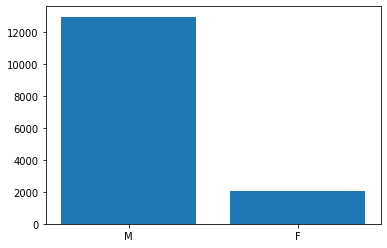

In [38]:
for col in cat_data.columns:
    plt.bar(cat_data[col].value_counts().index,cat_data[col].value_counts().values)
    plt.show()

In [39]:
data_train.skew()

age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              2.175285
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_apr    47.952438
debit_amount_may         10.296853
credit_amount_may        23.391690
credit_count_may          1.833915
debit_count_may           1.493358
max_credit_amount_ma

from above plot and skew data maximum numeric feature is highly skew, and categorical features are unbalance...
also cheaking boxplot of numeric feature:-

index 34 is out of bounds for axis 0 with size 34


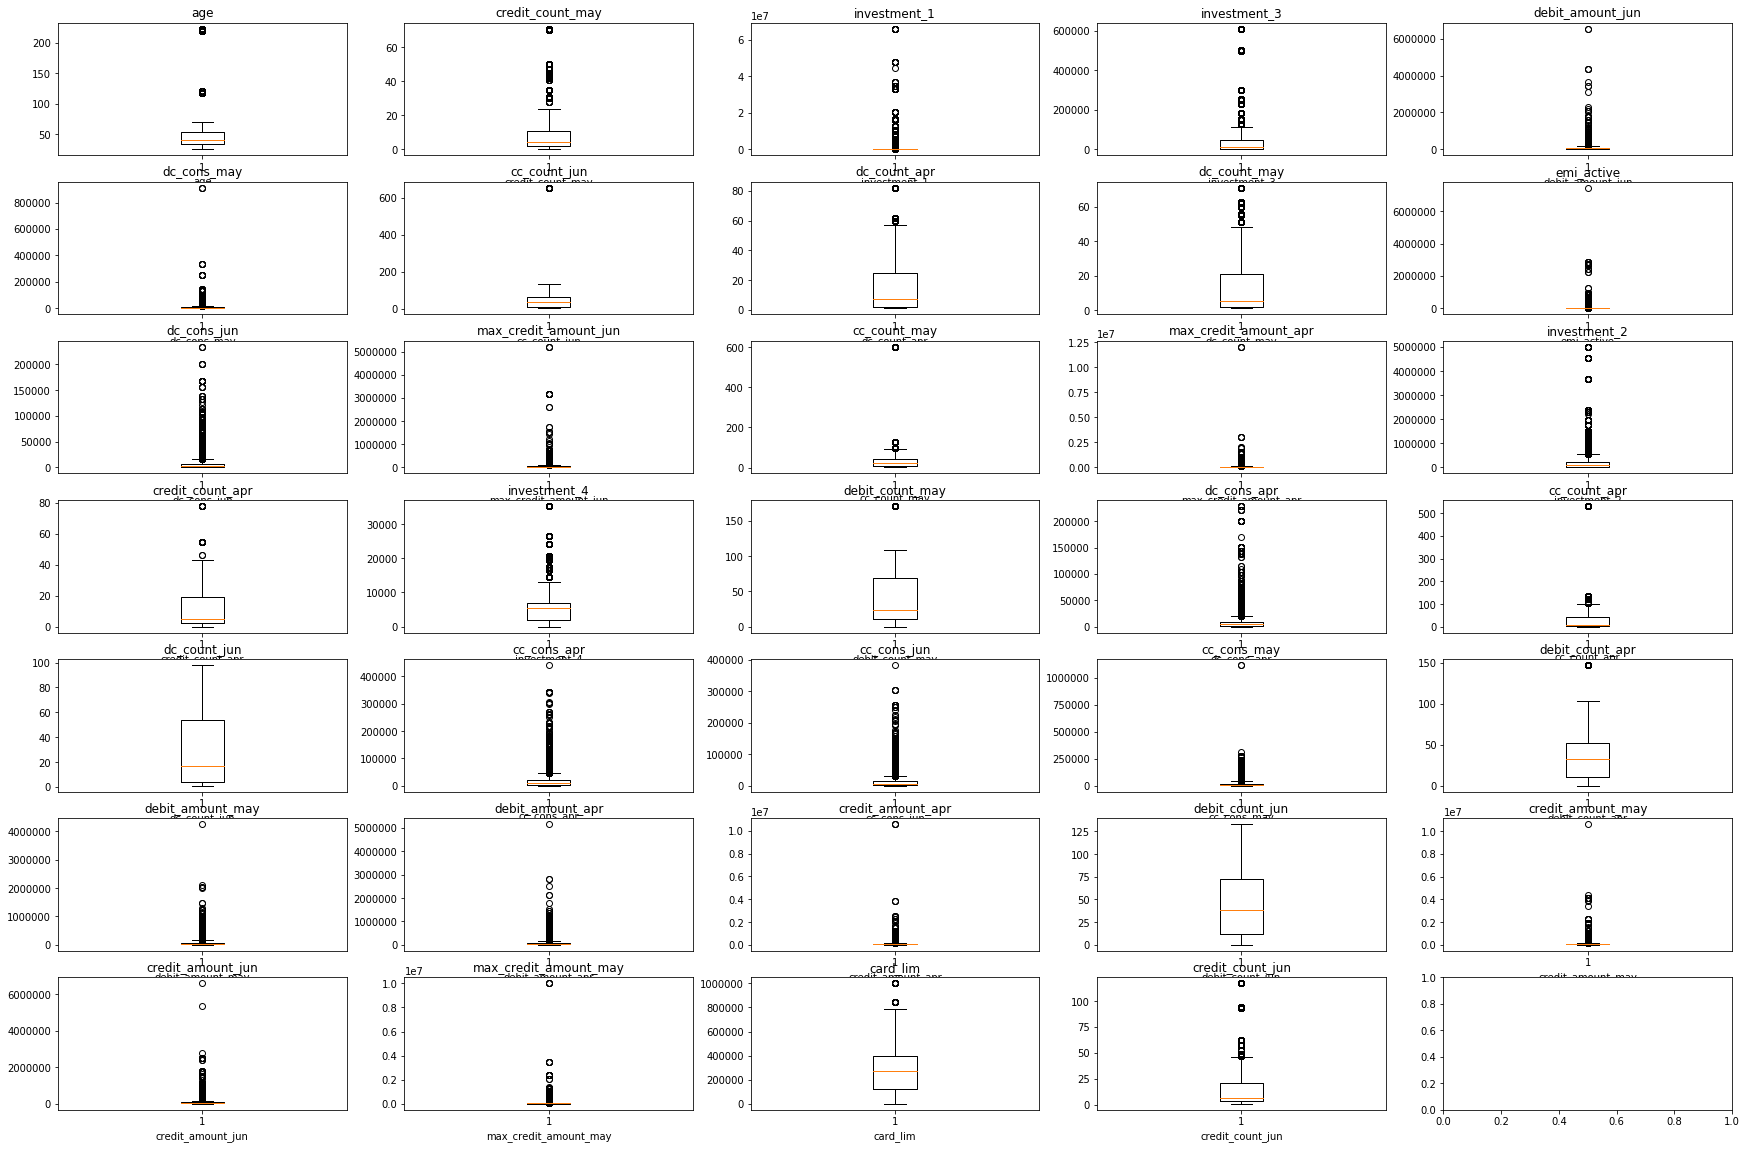

In [40]:
cols = numeric_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            axes[i,j].boxplot(numeric_data[col])
            #plt.figure(figsize=(20,20))
            axes[i,j].set_xlabel(col)
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

index 34 is out of bounds for axis 0 with size 34


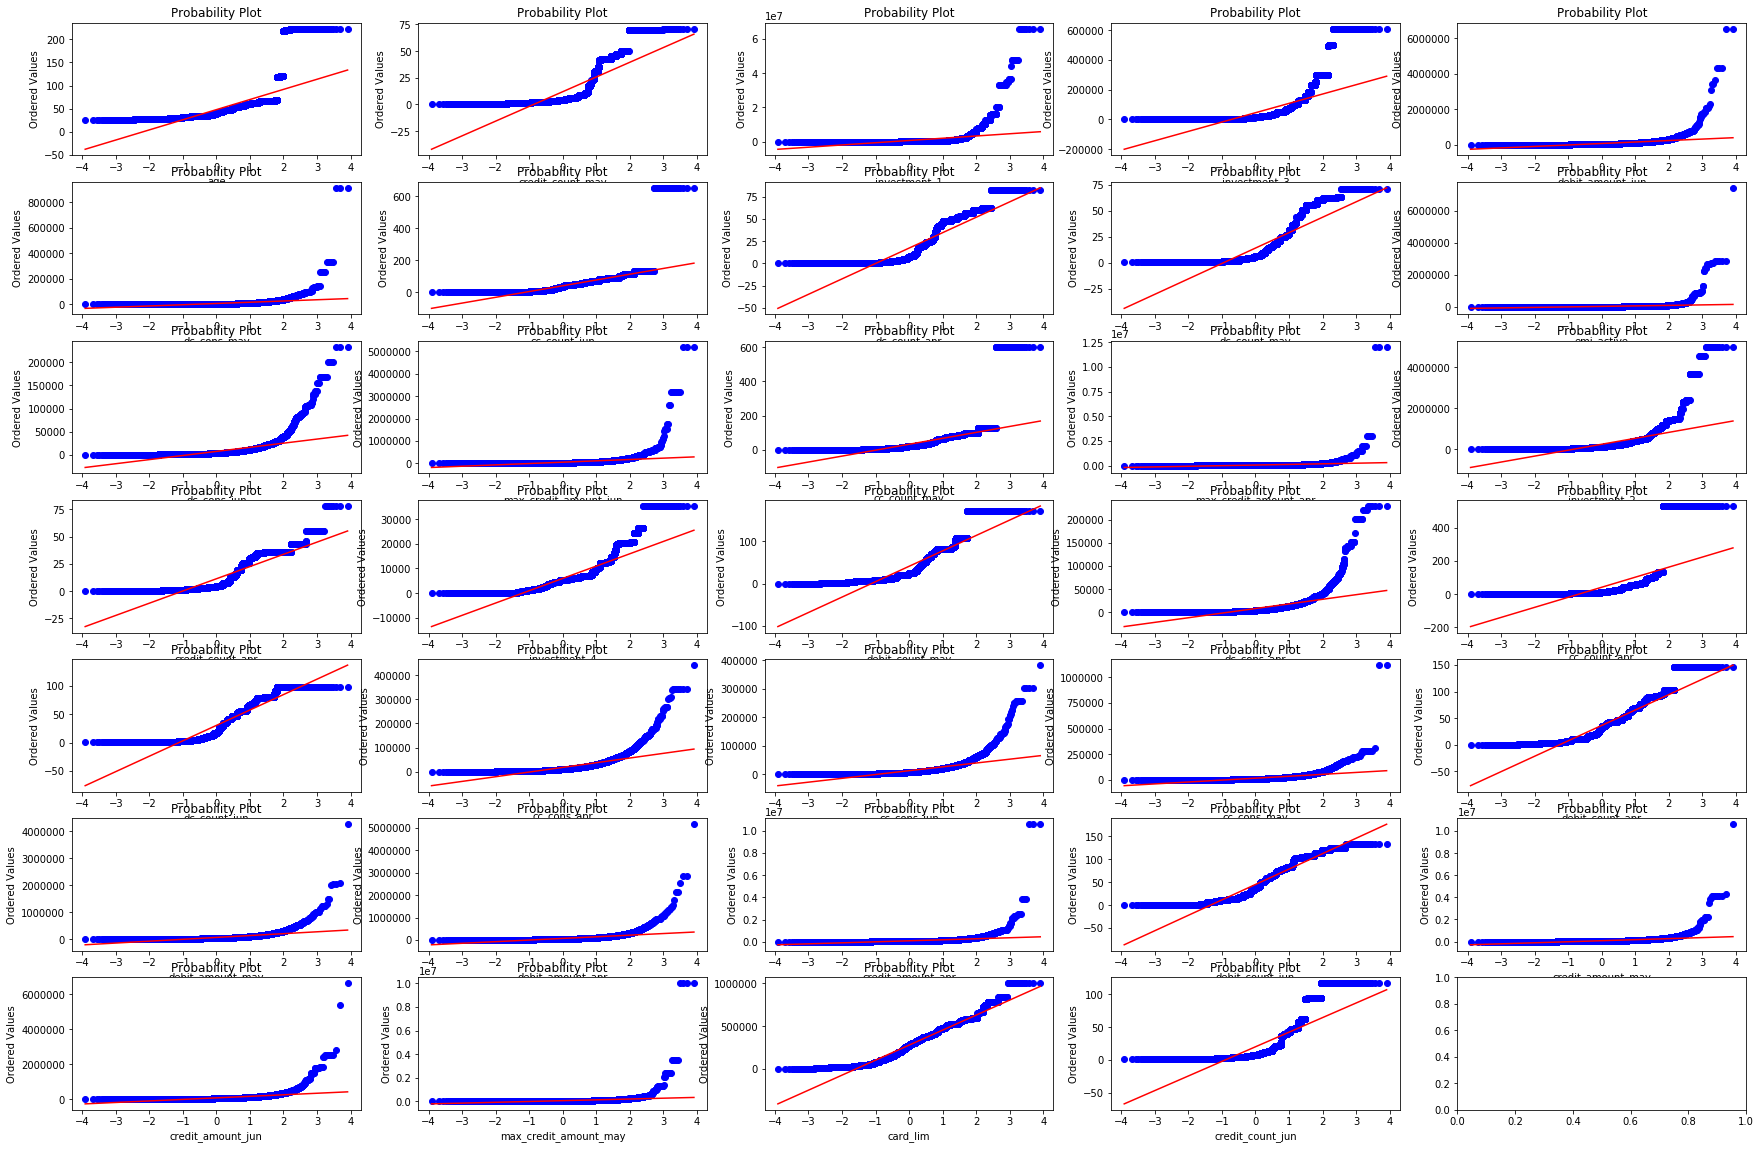

In [41]:
cols = numeric_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            stats.probplot(numeric_data[col], plot=axes[i,j])
            axes[i,j].set_xlabel(col)
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

it seems very high outlier in features,and its probablity plot is also showing wrong trends!

In [42]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(numeric_data)

,Feature,Number of Outliers
0,age,534
1,credit_count_may,2655
2,investment_1,2123
3,investment_3,1554
4,debit_amount_jun,1164
5,dc_cons_may,1248
6,cc_count_jun,49
7,dc_count_apr,434
8,dc_count_may,1233
9,emi_active,1393


# Bivarient:-
Also we can cheak how our dependent feature is changing acording to the independent feature

index 34 is out of bounds for axis 0 with size 34


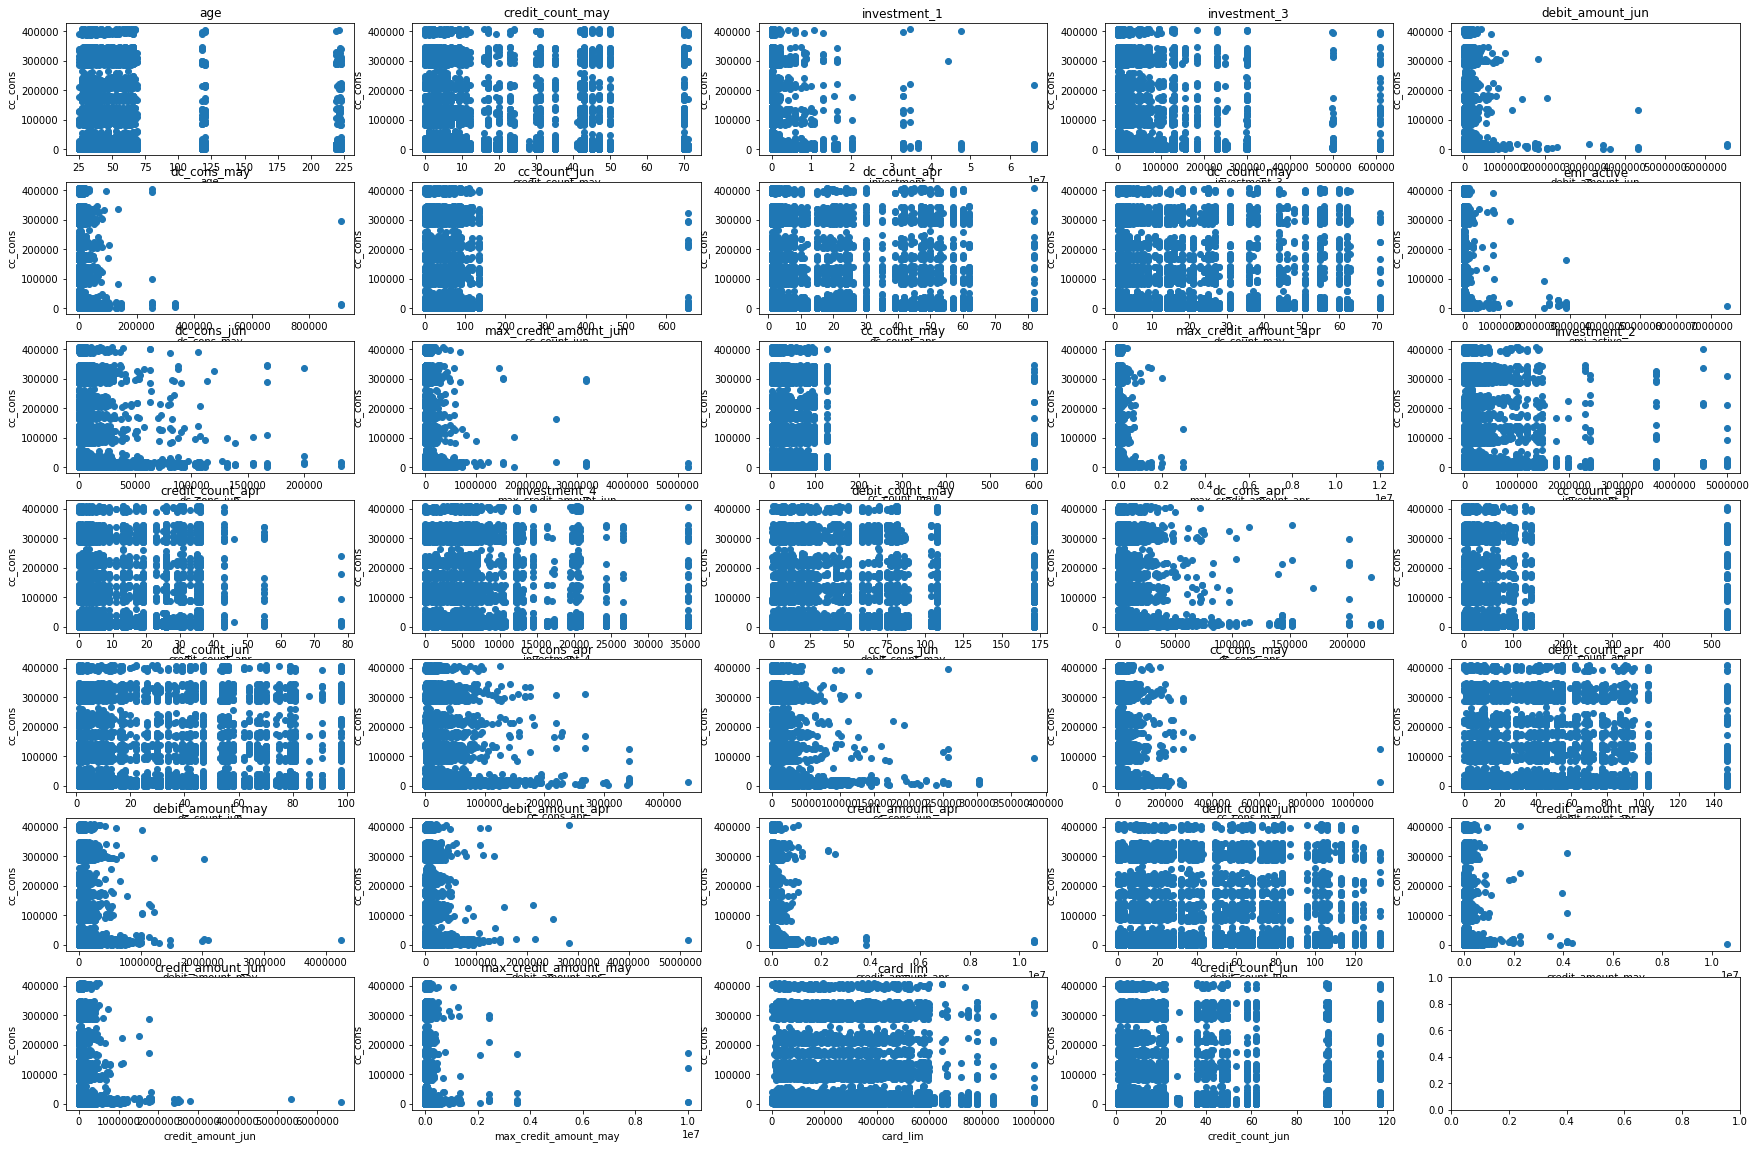

In [43]:
cols = numeric_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(numeric_data[col],data_train['cc_cons'])
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('cc_cons')
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

# Observation:-
#i am not seeing any linear trends in dependent feature with respect to the independent feature
#all feature is highly skewed
#independent feature is also highly skewed 
#probability plot is also not liner





In [44]:
cat_data

,account_type,gender
ID,,
12554,current,M
17645,current,M
7604,current,M
1590,current,F
16556,current,M
19106,current,M
10086,current,M
3045,current,M
17368,current,F


# Treating the outliers 

In [45]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

numeric_data=pd.concat([numeric_data,data_train['cc_cons']],axis=1)
numeric_data=treat_outliers(numeric_data)

In [50]:
numeric_data=numeric_data.drop('cc_cons',axis=1)


In [52]:
minmax=MinMaxScaler()
minmax.fit(numeric_data)
data_train_scale=pd.DataFrame(minmax.transform(numeric_data),columns=numeric_data.columns)
data_train_scale.head()

,age,credit_count_may,investment_1,investment_3,debit_amount_jun,dc_cons_may,cc_count_jun,dc_count_apr,dc_count_may,emi_active,...,debit_count_apr,debit_amount_may,debit_amount_apr,credit_amount_apr,debit_count_jun,credit_amount_may,credit_amount_jun,max_credit_amount_may,card_lim,credit_count_jun
0,0.194444,0.023810,0.000508,0.001627,0.160520,1.000000,0.085366,0.959184,0.302326,0.075188,...,0.265823,0.044472,0.602645,0.122526,0.623762,1.000000,0.056281,0.195448,0.814141,0.000000
1,0.194444,0.023810,0.278599,0.717138,0.245277,0.000000,0.121951,0.040816,0.465116,0.654691,...,0.405063,0.662854,0.053295,0.554878,0.603960,0.391555,0.469946,0.189099,0.203030,0.339286
2,0.750000,0.023810,0.216378,0.198863,0.359437,0.224811,1.000000,0.061224,0.000000,1.000000,...,0.873418,0.104324,0.216893,0.528914,0.000000,0.390449,0.463928,0.052875,0.349493,0.089286
3,0.027778,0.523810,0.106644,0.382058,0.440054,0.557041,0.573171,0.000000,0.000000,0.170516,...,0.506329,0.292137,0.048093,1.000000,0.801980,0.342674,0.421058,0.072024,0.258586,0.339286
4,0.166667,0.547619,0.000476,1.000000,0.020189,0.097530,0.963415,1.000000,0.348837,0.641291,...,0.544304,1.000000,0.088846,0.352008,0.297030,0.145733,0.495596,0.202158,0.545455,0.107143


In [59]:
data_train['cc_cons']=treat_outliers(pd.DataFrame(data_train['cc_cons']))
detect_outliers(pd.DataFrame(data_train['cc_cons']))

,Feature,Number of Outliers
0,cc_cons,3134


In [61]:
merge_data=pd.concat([cat_data,numeric_data,data_train['cc_cons']],axis=1)
merge_data

,account_type,gender,age,credit_count_may,investment_1,investment_3,debit_amount_jun,dc_cons_may,cc_count_jun,dc_count_apr,...,debit_amount_may,debit_amount_apr,credit_amount_apr,debit_count_jun,credit_amount_may,credit_amount_jun,max_credit_amount_may,card_lim,credit_count_jun,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,2.0,593.2000,787.0,30051.32,16077.96,10.0,48.0,...,11527.50,85919.48,25192.00,65.0,172336.00,12761.00,24563.00,430000.0,2.0,20014.0
17645,current,M,35,2.0,213557.1500,90525.0,42119.05,411.00,13.0,3.0,...,92276.57,12255.75,88693.37,63.0,71162.00,76206.00,23948.00,127500.0,21.0,10173.0
7604,current,M,55,2.0,165907.5700,25524.0,58373.25,3933.11,85.0,4.0,...,19343.00,34193.00,84880.00,2.0,70978.00,75283.00,10752.00,199999.0,7.0,16095.0
1590,current,F,29,23.0,81872.6500,48500.0,69851.51,9138.14,50.0,1.0,...,43867.91,11558.23,154070.50,83.0,63033.84,68708.00,12607.00,155000.0,21.0,7707.0
16556,current,M,34,24.0,568.8000,126001.0,10071.00,1939.00,82.0,50.0,...,136301.61,17022.81,58897.03,32.0,30286.00,80140.00,25213.00,297000.0,8.0,96408.0
19106,current,M,28,43.0,63590.4000,96558.0,52292.68,1045.85,59.0,25.0,...,35826.70,33149.03,34463.00,35.0,19584.00,157502.00,21440.00,150000.0,2.0,130263.0
10086,current,M,32,2.0,48796.4500,33774.0,27354.56,2151.00,5.0,1.0,...,56060.50,23194.85,18825.00,12.0,64994.00,157502.00,20444.00,187000.0,58.0,113479.0
3045,current,M,28,1.0,291969.2000,19400.0,52411.93,1956.00,59.0,25.0,...,47179.94,15211.28,74444.00,58.0,78997.00,7422.00,5630.00,120000.0,5.0,7463.0
17368,current,F,64,43.0,9624.6000,24619.0,59500.90,5672.00,84.0,1.0,...,32616.00,37737.64,57512.00,79.0,36852.00,10425.53,27418.00,110000.0,2.0,5712.0


In [62]:
skew=merge_data.skew()
skew

age                      0.455764
credit_count_may         1.482276
investment_1             1.758273
investment_3             1.403952
debit_amount_jun         0.854127
dc_cons_may              0.988034
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
emi_active               1.081571
dc_cons_jun              1.088507
max_credit_amount_jun    0.952071
cc_count_may             0.881148
max_credit_amount_apr    1.002865
investment_2             0.903871
credit_count_apr         1.004090
investment_4             0.511202
debit_count_may          0.577601
dc_cons_apr              1.022063
cc_count_apr             1.090164
dc_count_jun             0.577510
cc_cons_apr              0.950307
cc_cons_jun              0.959841
cc_cons_may              0.951935
debit_count_apr          0.493456
debit_amount_may         0.926990
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_jun          0.452473
credit_amount_

In [63]:
for col in skew[skew>1].index:
    merge_data[col]=np.log1p(merge_data[col])

In [64]:
merge_data.skew()

age                      0.455764
credit_count_may         0.675347
investment_1            -0.515046
investment_3            -0.224103
debit_amount_jun         0.854127
dc_cons_may              0.988034
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             0.282131
emi_active              -0.551012
dc_cons_jun             -0.222609
max_credit_amount_jun    0.952071
cc_count_may             0.881148
max_credit_amount_apr    0.075344
investment_2             0.903871
credit_count_apr         0.142052
investment_4             0.511202
debit_count_may          0.577601
dc_cons_apr             -0.339570
cc_count_apr             0.072915
dc_count_jun             0.577510
cc_cons_apr              0.950307
cc_cons_jun              0.959841
cc_cons_may              0.951935
debit_count_apr          0.493456
debit_amount_may         0.926990
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_jun          0.452473
credit_amount_

# Encoding the cat Feature:

In [65]:
for col in merge_data.select_dtypes(include='object').columns:
    lab=LabelEncoder()
    merge_data[col]=lab.fit_transform(merge_data[col])

In [66]:
merge_data

,account_type,gender,age,credit_count_may,investment_1,investment_3,debit_amount_jun,dc_cons_may,cc_count_jun,dc_count_apr,...,debit_amount_may,debit_amount_apr,credit_amount_apr,debit_count_jun,credit_amount_may,credit_amount_jun,max_credit_amount_may,card_lim,credit_count_jun,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,0,1,35,1.098612,6.387216,6.669498,30051.32,16077.96,10.0,48.0,...,11527.50,85919.48,25192.00,65.0,172336.00,12761.00,24563.00,430000.0,1.098612,9.904237
17645,0,1,35,1.098612,12.271664,11.413392,42119.05,411.00,13.0,3.0,...,92276.57,12255.75,88693.37,63.0,71162.00,76206.00,23948.00,127500.0,3.091042,9.227591
7604,0,1,55,1.098612,12.019192,10.147414,58373.25,3933.11,85.0,4.0,...,19343.00,34193.00,84880.00,2.0,70978.00,75283.00,10752.00,199999.0,2.079442,9.686326
1590,0,0,29,3.178054,11.312932,10.789340,69851.51,9138.14,50.0,1.0,...,43867.91,11558.23,154070.50,83.0,63033.84,68708.00,12607.00,155000.0,3.091042,8.950014
16556,0,1,34,3.218876,6.345285,11.744053,10071.00,1939.00,82.0,50.0,...,136301.61,17022.81,58897.03,32.0,30286.00,80140.00,25213.00,297000.0,2.197225,11.476355
19106,0,1,28,3.784190,11.060234,11.477909,52292.68,1045.85,59.0,25.0,...,35826.70,33149.03,34463.00,35.0,19584.00,157502.00,21440.00,150000.0,1.098612,11.777318
10086,0,1,32,1.098612,10.795433,10.427476,27354.56,2151.00,5.0,1.0,...,56060.50,23194.85,18825.00,12.0,64994.00,157502.00,20444.00,187000.0,4.077537,11.639382
3045,0,1,28,0.693147,12.584407,9.873080,52411.93,1956.00,59.0,25.0,...,47179.94,15211.28,74444.00,58.0,78997.00,7422.00,5630.00,120000.0,1.791759,8.917847
17368,0,0,64,3.784190,9.172181,10.111314,59500.90,5672.00,84.0,1.0,...,32616.00,37737.64,57512.00,79.0,36852.00,10425.53,27418.00,110000.0,1.098612,8.650500


# Feature engineering

corelation between dependent and independent

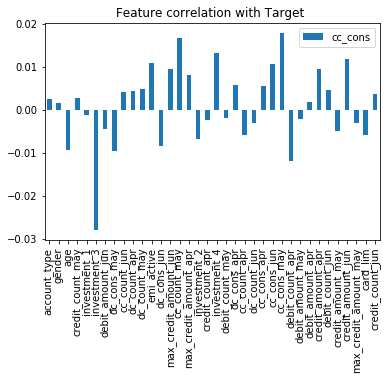

<Figure size 2160x1440 with 0 Axes>

In [67]:
corr=pd.DataFrame(merge_data.corr()['cc_cons'].drop('cc_cons'))
corr.plot(kind='bar')
plt.title('Feature correlation with Target ')
plt.figure(figsize=(30,20))
plt.show()

In [68]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_type,15000.0,0.151533,0.358580,0.000000,0.000000,0.000000,0.000000,1.000000
gender,15000.0,0.863000,0.343859,0.000000,1.000000,1.000000,1.000000,1.000000
age,15000.0,43.343200,12.291955,28.000000,33.000000,40.000000,53.000000,64.000000
credit_count_may,15000.0,1.903374,1.032566,0.693147,1.098612,1.609438,2.484907,3.784190
investment_1,15000.0,10.274603,2.349367,5.323010,8.716208,10.715240,11.993529,13.548954
investment_3,15000.0,9.248650,1.742853,6.369901,7.703008,9.537772,10.798575,11.744053
debit_amount_jun,15000.0,59805.270644,44155.369637,7196.500000,25732.592500,45803.650000,84619.095000,149576.730000
dc_cons_may,15000.0,5600.915100,4987.249964,411.000000,1643.500000,3820.500000,8212.000000,16077.960000
cc_count_jun,15000.0,38.130533,28.581021,3.000000,10.000000,35.000000,61.000000,85.000000
dc_count_apr,15000.0,16.489800,17.845513,1.000000,2.000000,7.000000,25.000000,50.000000


In [70]:
corr_matrix=merge_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print(to_drop)

# Dropping the high correlated features
print("Columns to be dropped: ")
merge_data.drop(to_drop,axis=1,inplace=True)

[]
Columns to be dropped: 


here no any dependent feature corelated more than 0.5 to each other,so no need to drop the dependent feature

# Linear Model

In [71]:
y=merge_data.cc_cons
X=merge_data.drop('cc_cons',axis=1)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,)

In [96]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [97]:
def model(model,X_train,X_test,y_train,y_test):
    mod=model()
    mod.fit(X_train,y_train)
    y=mod.predict(X_test)
    msle=rmsle((np.exp(y_test)-1),(np.exp(y)-1))
    mse=mean_squared_error((np.exp(y_test)-1),(np.exp(y)-1))
    r2=r2_score(y_test,y)
    return (msle,mse,r2)

In [98]:
model(LinearRegression,X_train,X_test,y_train,y_test)

(1.415716495277988, 5925291129.570002, -0.000744918212107093)

In [91]:
model(Lasso,X_train,X_test,y_train,y_test)

(1.416506461015923, 5932178734.3488655, -0.0018620553845929422)

In [76]:
model(Ridge,X_train,X_test,y_train,y_test)

(1.4157164071027386, 5925291354.786458, -0.0007447935530671135)

# Polynomial model

In [77]:
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [78]:
poly_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [79]:
y_poly=poly_model.predict(X_test)

In [80]:
np.sqrt(mean_squared_log_error((np.exp(y_test)-1),(np.exp(y_poly)-1)))

1.4663460654489597

# DecisionTree Regressor

In [101]:
tree=DecisionTreeRegressor(random_state=42,max_depth=4)
tree.fit(X_train,y_train)
y_tree=tree.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(y_tree)-1))

1.4230055956182401

# RandomForest Regressor

In [111]:
rfor=RandomForestRegressor(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
rfor.fit(X_train,y_train)
y_rf=rfor.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(y_rf)-1))
#r2_score((np.exp(y_test)-1),(np.exp(y_rf)-1))


1.4167895881900665

In [113]:
rf=RandomForestRegressor()
parameter_grid = {"max_depth": [2,3, 5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}
grid_search=GridSearchCV(estimator=rf,param_grid =parameter_grid)
grid_search.fit(X_train,y_train)
y_gs=grid_search.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(y_gs)-1))

1.4154962619017788

In [115]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=2,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Random Search

In [120]:

random_search=RandomizedSearchCV(estimator=rf,param_distributions =parameter_grid,n_iter=20,random_state=0)
random_search.fit(X_train,y_train)
y_rs=random_search.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(y_rs)-1))

1.4149915421608343

# XGBRegressor

In [124]:

xgb_clf=XGBRFRegressor(base_estimator=tree, random_state=0)
xgb_clf.fit(X_train,y_train)
xg_y=xgb_clf.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(xg_y)-1))

[21:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1.4151907284819456

# GradientBoostingRegressor

In [126]:
gd=GradientBoostingRegressor(random_state=0)
gd.fit(X_train,y_train)
y_gd=gd.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(y_gd)-1))

1.4236688593180153